In [1]:
import pickle
import tensorflow
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2
from IPython.display import display, Image
import os

In [3]:
feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [12]:
to_remove = '/kaggle/input/fashion-product-images-small'

# Remove the specified part from each filename
new_filenames = [filename.replace(to_remove, '') for filename in filenames]

In [13]:
new_filenames[0]

'/images/31973.jpg'

In [27]:
file_paths = ['C:/Users/Dhruv/Downloads/archive (1)'+filename for filename in new_filenames]

In [36]:
img = image.load_img('shoe.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)

1/1 [==============================] - 0s 79ms/step
[[ 9441  7390 42169 12509  6079 20336]]


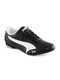

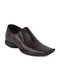

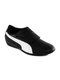

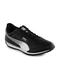

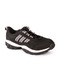

In [37]:
for file in indices[0][1:6]:
    display(Image(filename=file_paths[file]))